In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_least_nan_value_index(data):
    for column in data.columns:
        print(data[data[column].isnull()].index.min())

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
air_quality_data_frame = pd.read_csv('AirQualityUCI/AirQualityUCI.csv', delimiter=';', header=0)

In [5]:
air_quality_data_frame.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
air_quality_data_frame.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [7]:
air_quality_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [8]:
air_quality_data_frame_remove_nan_v_1 = air_quality_data_frame.dropna(axis=1, how='all')

In [9]:
air_quality_data_frame_remove_nan_v_1.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [10]:
air_quality_data_frame_remove_nan_v_1.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [11]:
air_quality_data_frame_remove_nan_v_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [12]:
print_least_nan_value_index(air_quality_data_frame_remove_nan_v_1)

9357
9357
9357
9357
9357
9357
9357
9357
9357
9357
9357
9357
9357
9357
9357


In [13]:
air_quality_data_frame_remove_nan_v_2 = air_quality_data_frame_remove_nan_v_1.dropna(axis='index', how='any')

In [14]:
air_quality_data_frame_remove_nan_v_2.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [15]:
air_quality_data_frame_remove_nan_v_2.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


In [16]:
air_quality_data_frame_remove_nan_v_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [17]:
air_quality_data_frame_remove_nan_v_2_CO_GT = air_quality_data_frame_remove_nan_v_2.loc[:, 'CO(GT)'].apply(lambda x: float(str(x).replace(',', '.')))
air_quality_data_frame_remove_nan_v_2_C6H6_GT = air_quality_data_frame_remove_nan_v_2.loc[:, 'C6H6(GT)'].apply(lambda x: float(str(x).replace(',', '.')))
air_quality_data_frame_remove_nan_v_2_T = air_quality_data_frame_remove_nan_v_2.loc[:, 'T'].apply(lambda x: float(str(x).replace(',', '.')))
air_quality_data_frame_remove_nan_v_2_RH = air_quality_data_frame_remove_nan_v_2.loc[:, 'RH'].apply(lambda x: float(str(x).replace(',', '.')))
air_quality_data_frame_remove_nan_v_2_AH = air_quality_data_frame_remove_nan_v_2.loc[:, 'AH'].apply(lambda x: float(str(x).replace(',', '.')))

In [18]:
air_quality_data_frame_remove_nan_v_2 = pd.concat([
    air_quality_data_frame_remove_nan_v_2.drop(['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], axis='columns'),
    air_quality_data_frame_remove_nan_v_2_CO_GT,
    air_quality_data_frame_remove_nan_v_2_C6H6_GT,
    air_quality_data_frame_remove_nan_v_2_T,
    air_quality_data_frame_remove_nan_v_2_RH,
    air_quality_data_frame_remove_nan_v_2_AH
], axis='columns')

In [19]:
air_quality_data_frame_remove_nan_v_2.head()

,Date,Time,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),T,RH,AH
0,10/03/2004,18.00.00,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,2.6,11.9,13.6,48.9,0.7578
1,10/03/2004,19.00.00,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,2.0,9.4,13.3,47.7,0.7255
2,10/03/2004,20.00.00,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,2.2,9.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,2.2,9.2,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,1.6,6.5,11.2,59.6,0.7888


In [20]:
air_quality_data_frame_remove_nan_v_2.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,-34.207524,1.865683,9.778305,39.485380,-6.837604
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,77.657170,41.380206,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,0.600000,4.000000,10.900000,34.100000,0.692300
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,1.500000,7.900000,17.200000,48.600000,0.976800
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,2.600000,13.600000,24.100000,61.900000,1.296200
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,11.900000,63.700000,44.600000,88.700000,2.231000


In [21]:
air_quality_data_frame_remove_nan_v_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
CO(GT)           9357 non-null float64
C6H6(GT)         9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [25]:
air_quality_data_frame_remove_nan_v_2_Time = air_quality_data_frame_remove_nan_v_2.loc[:, 'Time'].apply(lambda x: str(x).replace('.', ':'))

In [26]:
air_quality_data_frame_remove_nan_v_2_Timestamp = pd.concat(
    [
        air_quality_data_frame_remove_nan_v_2['Date'],
        air_quality_data_frame_remove_nan_v_2_Time
    ], axis='columns').apply(lambda x: pd.to_datetime(x[0] + ' ' + x[1]), axis='columns')

In [27]:
air_quality_data_frame_remove_nan_v_3 = pd.concat([
    air_quality_data_frame_remove_nan_v_2_Timestamp.rename('Timestamp', inplace=True),
    air_quality_data_frame_remove_nan_v_2.drop(['Date', 'Time'], axis='columns')
], axis='columns')

In [28]:
air_quality_data_frame_remove_nan_v_3.head()

,Timestamp,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),T,RH,AH
0,2004-10-03 18:00:00,1360.0,150.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,2.6,11.9,13.6,48.9,0.7578
1,2004-10-03 19:00:00,1292.0,112.0,955.0,103.0,1174.0,92.0,1559.0,972.0,2.0,9.4,13.3,47.7,0.7255
2,2004-10-03 20:00:00,1402.0,88.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,2.2,9.0,11.9,54.0,0.7502
3,2004-10-03 21:00:00,1376.0,80.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,2.2,9.2,11.0,60.0,0.7867
4,2004-10-03 22:00:00,1272.0,51.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,1.6,6.5,11.2,59.6,0.7888


In [29]:
air_quality_data_frame_remove_nan_v_3.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),CO(GT),C6H6(GT),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,-34.207524,1.865683,9.778305,39.485380,-6.837604
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,77.657170,41.380206,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,0.600000,4.000000,10.900000,34.100000,0.692300
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,1.500000,7.900000,17.200000,48.600000,0.976800
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,2.600000,13.600000,24.100000,61.900000,1.296200
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,11.900000,63.700000,44.600000,88.700000,2.231000


In [30]:
air_quality_data_frame_remove_nan_v_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
Timestamp        9357 non-null datetime64[ns]
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
CO(GT)           9357 non-null float64
C6H6(GT)         9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


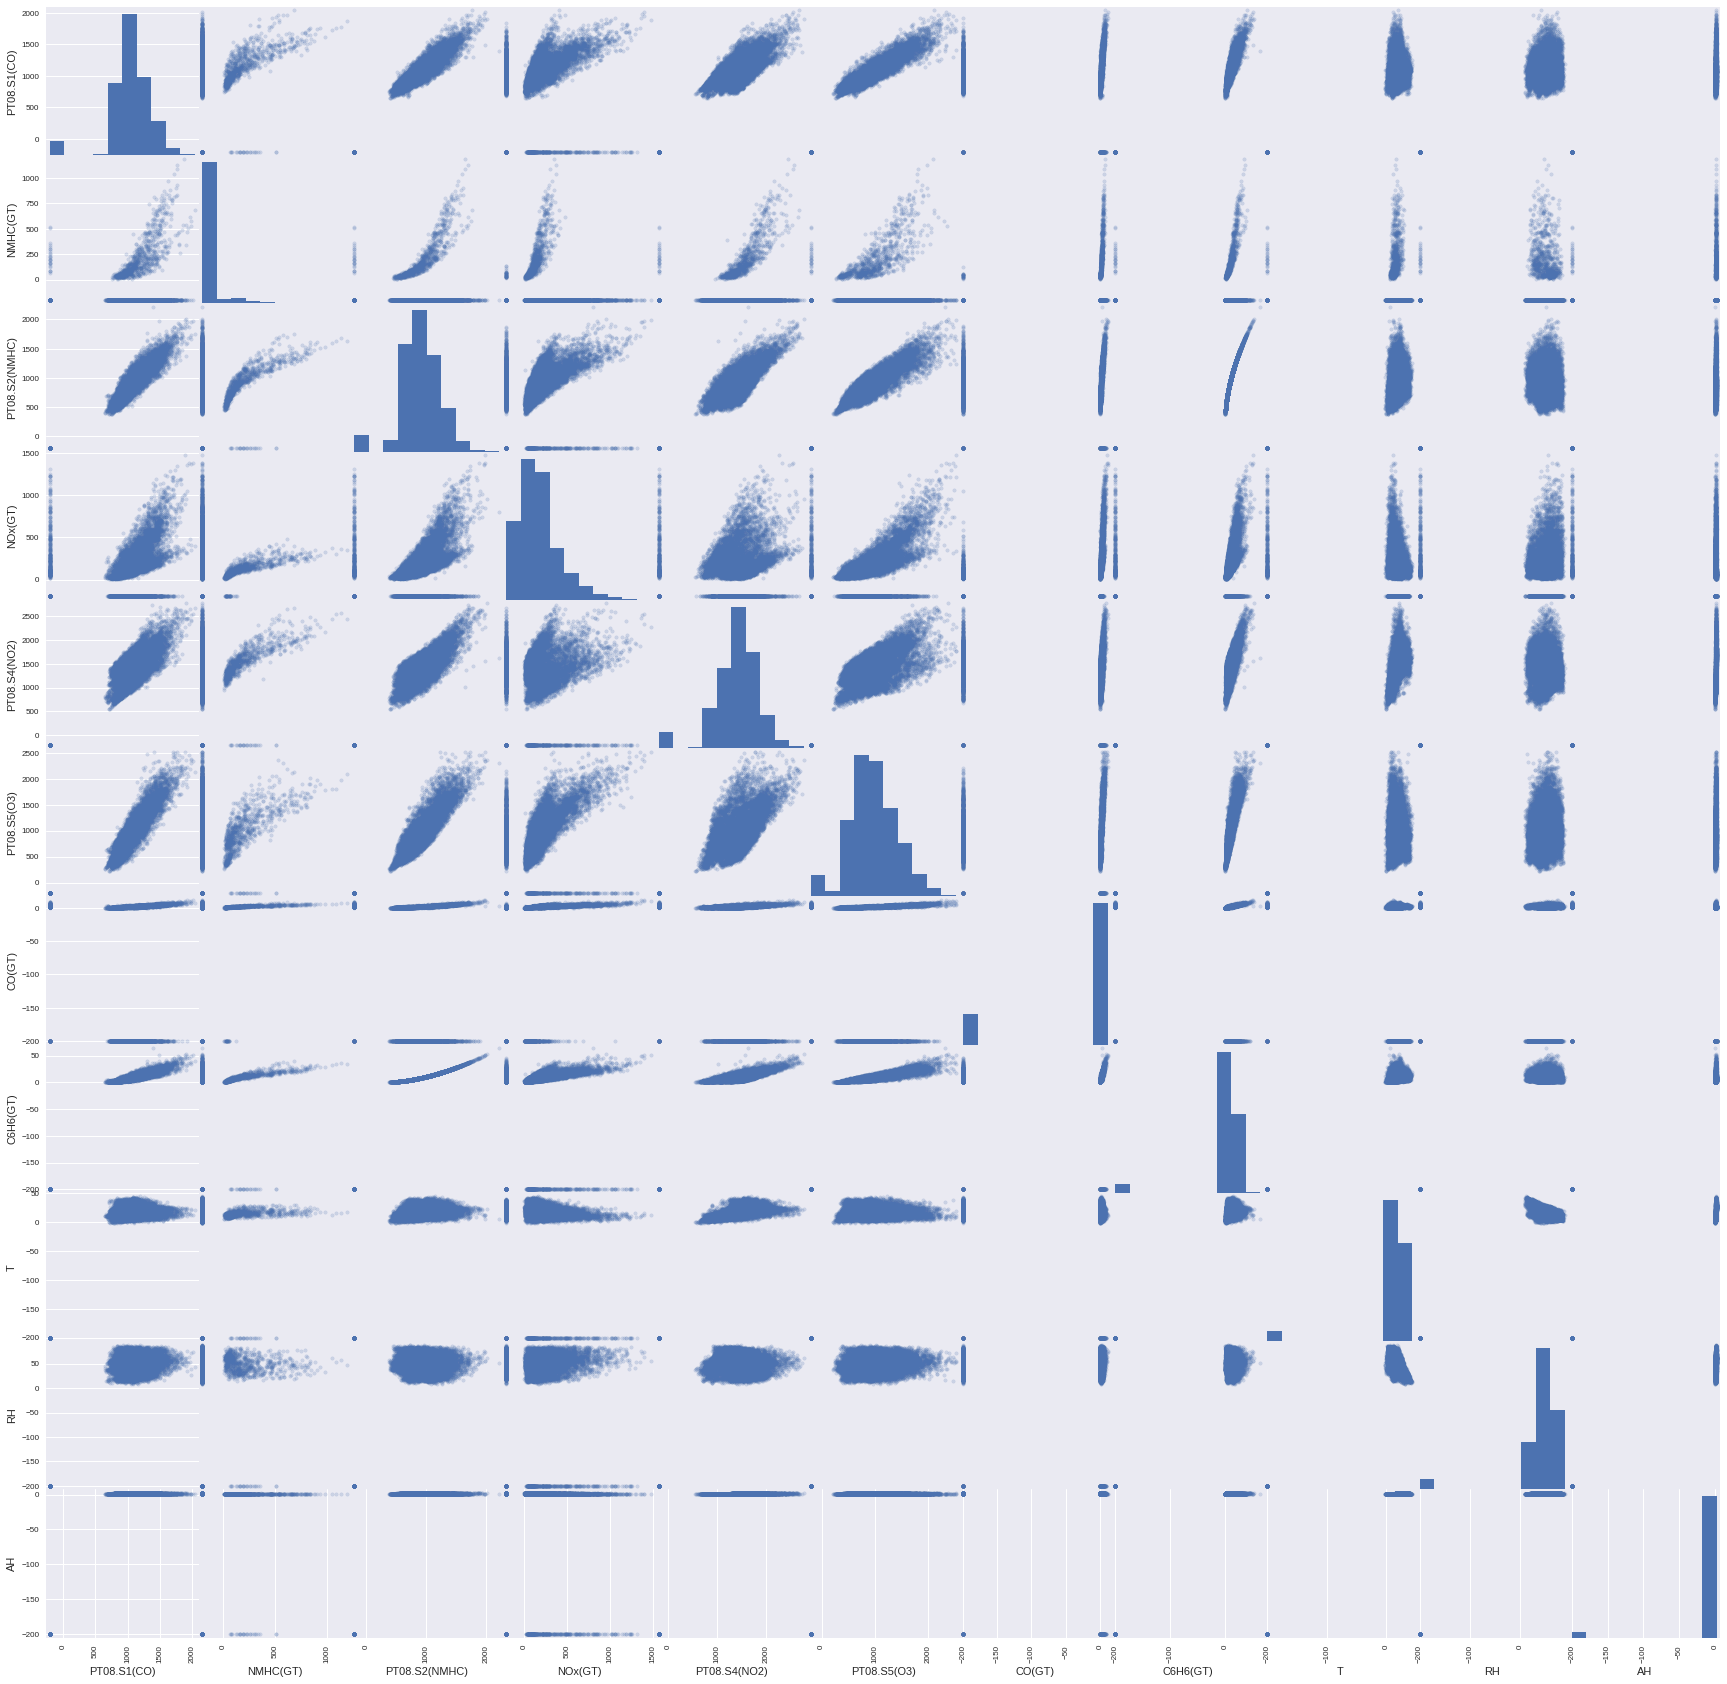

In [31]:
pd.tools.plotting.scatter_matrix(
    air_quality_data_frame_remove_nan_v_3[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']],
    alpha=0.2,
    figsize=(30, 30),
    diagonal='hist'
)
pylab.show()

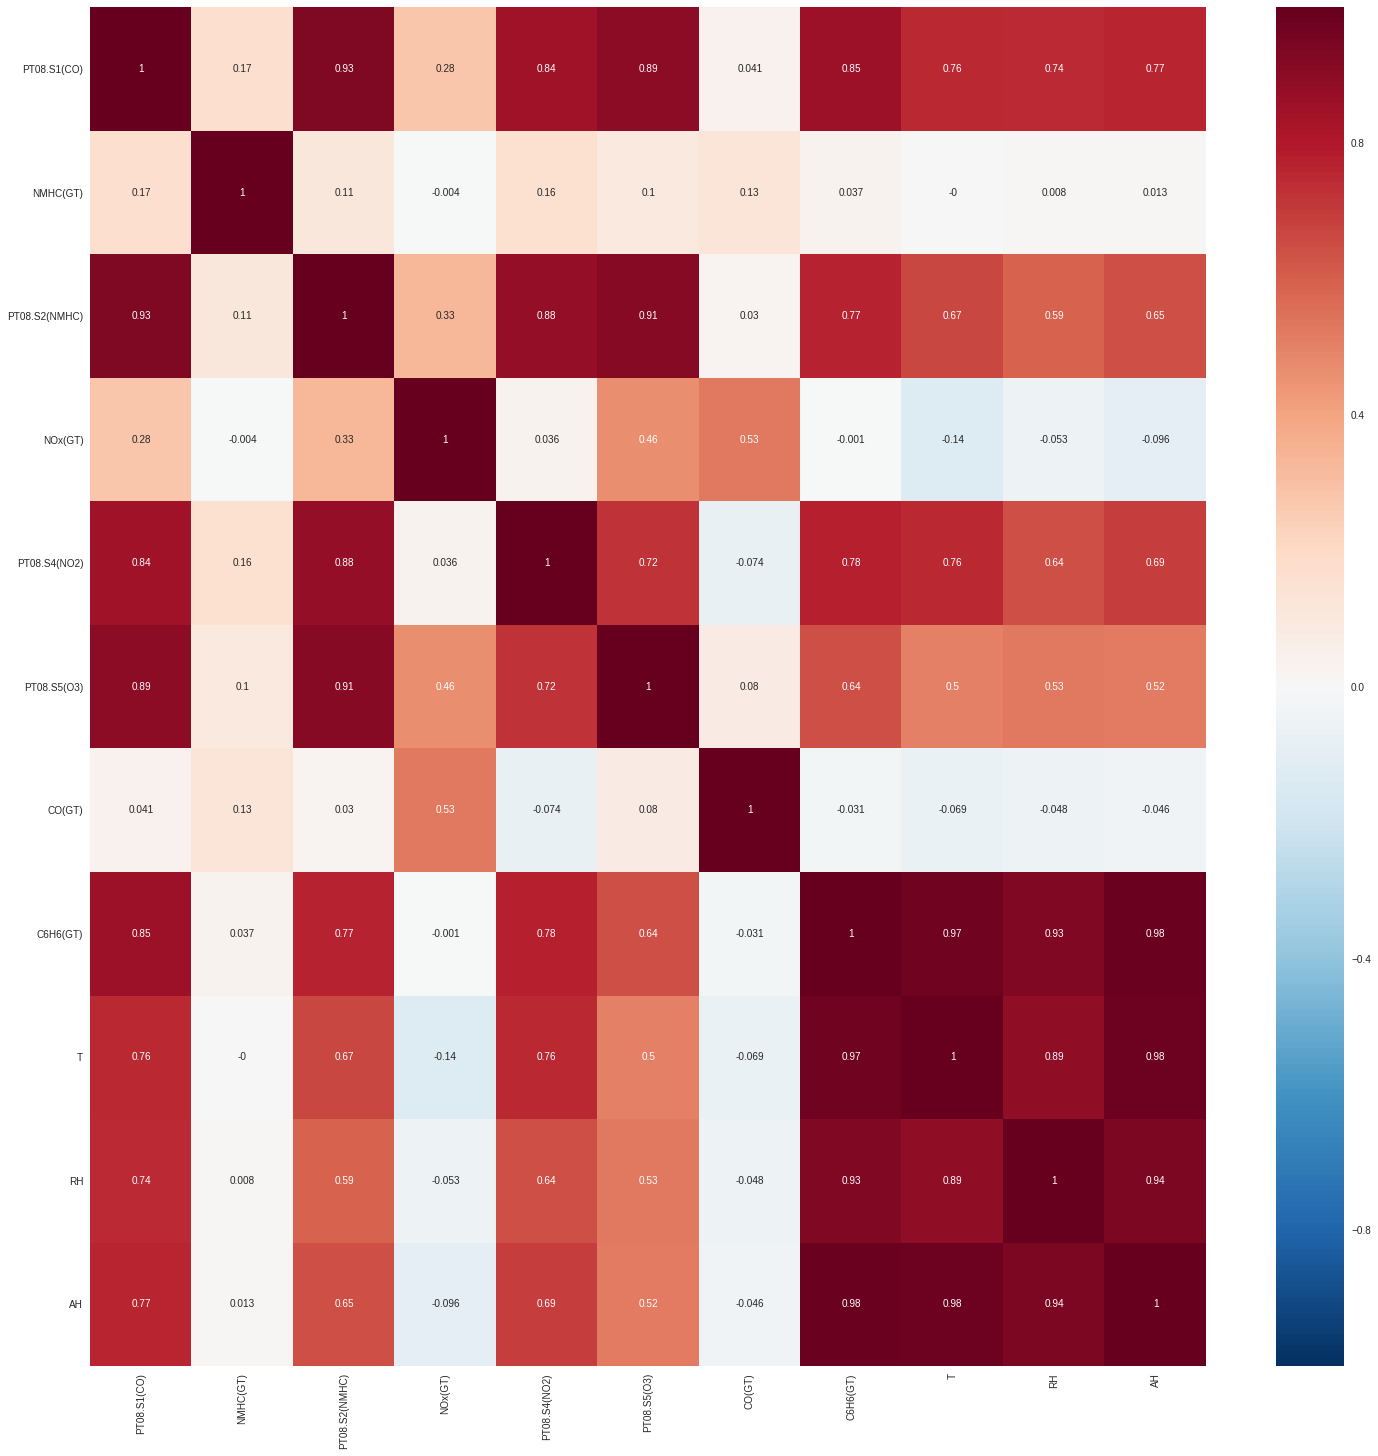

In [32]:
corr = air_quality_data_frame_remove_nan_v_3[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']].corr()
plt.figure(figsize = (25, 25))
sns.heatmap(corr.applymap(lambda x: round(x, 3)), xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)

plt.xticks(rotation=90) 
plt.yticks(rotation=0) 
plt.show()

In [33]:
Y = air_quality_data_frame_remove_nan_v_3['C6H6(GT)']
X = air_quality_data_frame_remove_nan_v_3[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'CO(GT)', 'T', 'RH', 'AH']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.571e+05
Date:                Tue, 16 Jan 2018   Prob (F-statistic):               0.00
Time:                        02:03:42   Log-Likelihood:                -15677.
No. Observations:                9357   AIC:                         3.138e+04
Df Residuals:                    9346   BIC:                         3.145e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           -14.6046      0.123   -118.935